<a href="https://colab.research.google.com/github/vaariasa/senalesysistemas/blob/master/parcial_1se%C3%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller/Parcial_1: Señales y sistemas 2020-1
Valentina Arias Arias.

Universidad Nacional de Colombia- sede Manizales

#2. Conceptos básicos de señales

– Evaluar la expresión $\int_{-\infty}^{\infty}t^2e^{-\sin(t)}
\cos(2t)\delta(2t-2\pi)dt$.
 Comprobar el resultado en simulacion con la librería SymPy.

 **Solucion:**

$I= \int_{-\infty}^{\infty}t^2e^{-\sin(t)}
\cos(2t)\delta(2t-2\pi)dt$

$I= \int_{-\infty}^{\infty}t^2e^{-\sin(t)}
\cos(2t)\delta(2[t-\pi])dt$

Por la propiedad de escalamiento:

$I= \frac{1}{|2|}\int_{-\infty}^{\infty}t^2e^{-\sin(t)}\cos(2t)\delta(t-\pi)dt$

Como $\delta(t-\pi)$ se aciva en $\pi$, entonces:

$I= \frac{x(\pi)}{2}$

$= \frac{1}{2}\pi^2e^{-\sin(\pi)}\cos(2\pi)$

Donde $\cos(2\pi)=1$, $e^{-\sin(\pi)}=1$, por lo que:

$$I= \frac{1}{2}\pi^2$$




In [0]:
!pip install sympy

In [1]:
import sympy as sym
sym.init_printing()
t = sym.symbols('t', real=True)
delta = sym.DiracDelta(2*(t-sym.pi))
f= sym.Function('f')(t)
f= t**(2)*sym.exp(-sym.sin(t))*sym.cos(2*t)
sym.integrate(delta*f, (t, -sym.oo, sym.oo))

$$\frac{\pi^{2}}{2}$$




– Sea $x(t) = u(t-to)-u(t-nto)-k\delta(t-mto)$. Determine
el valor de k para el cual $\int_{-\infty}^{\infty}x(t)dt = 0$. Comprobar el
resultado en simulacion con la librería SymPy.

**Solucion:**


$0= \int_{-\infty}^{\infty} u(t-to)-u(t-nto)-k\delta(t-mto)dt$

$0= \int_{-\infty}^{\infty} u(t-to)-u(t-nto)dt-k\int_{-\infty}^{\infty}\delta(t-mto)dt$

$0= \int_{t_0}^{nt_0}dt-k$

$0= t\Biggr|_{t_0}^{nt_0}-k$

$$k= nt_0-t_0$$





In [0]:
import sympy as sym
to = sym.symbols('to ', real=True)
nto = sym.symbols('nto ', real=True)
mto = sym.symbols('mto ', real=True)
t = sym.symbols('t ', real=True)
k = sym.symbols('k ', real=True)
delta= sym.DiracDelta(t-mto)
a= sym.integrate(1,(t,to,nto))
a-sym.integrate(k*delta, (t, -sym.oo, sym.oo))

$- k + nto - to$
por lo que se comprueba que $k=nto-to$

– Consulte en que consisten las señales cuasiperiodicas. Luego, demuestre la periodicidad o no de las siguientes señales

• $x(t) = 3\cos(wt)$

Señal periodica $x(t) =x(t\pm T)$ 

$3\cos(wt)=3\cos(w(t\pm T)=3\cos(wt \pm wT)$

$\alpha=wt, \beta=wT$

$3\cos(wt \pm wT)= 3[\cos(wt)\cos(wT)\pm \sin(wt)\sin(wT)]$

$w=\frac{2\pi}{T_o}; T_o=T$

$3\cos(wt \pm wT)= 3[\cos(wt)\cos(\frac{2\pi}{T}T)\pm \sin(wt)\sin(\frac{2\pi}{T}T)]$

$\cos(\frac{2\pi}{T}T)=1$; $\sin(\frac{2\pi}{T}T)=0$

$$3\cos(wt \pm wT)= 3\cos(wt)$$ **La señal es periodica**

F = 1.0[Hz]


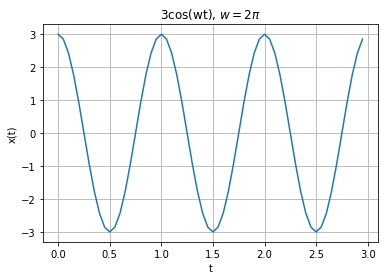

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
w = 2*np.pi
f= w/(2*np.pi)
print('F = %.1f[Hz]'% (f))
fs= 20*f
t= 1/f
ts= 1/fs
vt = np.arange(0,3*t,ts)
x = 3*np.cos(w*vt)
plt.plot(vt,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("3cos(wt), $w=2\pi$")
plt.grid()
plt.show()

• $x(t) = 2 \sin(wt +\pi)$

$x(t) = 2 \sin(wt +\pi)= 2 \sin(w(t\pm T) +\pi)$=?

$2 \sin(w(t\pm T) +\pi)= 2 \sin((wt +\pi)\pm wT)$

$\alpha=wt+\pi; \beta=wT$

$2 \sin(w(t\pm T) +\pi)=2[\sin(wt +\pi)\cos(wT) \pm sin(wT)\cos(wt+\pi)]$

$w=\frac{2\pi}{T_o}; T_o=T$

$2 \sin(w(t\pm T) +\pi)=2[\sin(wt +\pi)\cos(\frac{2\pi}{T}T) \pm sin(\frac{2\pi}{T}T)\cos(wt+\pi)]$

$\cos(\frac{2\pi}{T}T)=1$; $\sin(\frac{2\pi}{T}T)=0$

$$2 \sin(w(t\pm T) +\pi) = 2 \sin(wt +\pi)$$ **la señal es periodica**


F = 100.0[Hz]


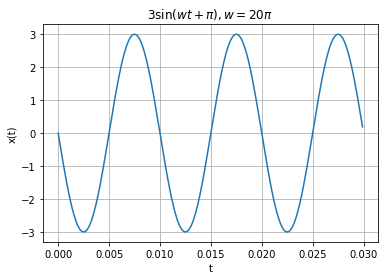

In [0]:
w= 200*np.pi
f= w/(2*np.pi)
print('F = %.1f[Hz]'% (f))
fs= 100*f
t= 1/f
ts= 1/fs
vt = np.arange(0,3*t,ts)
x = 3*np.sin((w*vt)+np.pi)
plt.plot(vt,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("$3\sin(wt+\pi), w=20\pi$")
plt.grid()
plt.show()

• $x(t)=3\sin(\sqrt3t)+3\sin(5t)-2\cos(t/\sqrt3)$

$w_1=\sqrt3=\frac{2\pi}{T_1}; w_2=5=\frac{2\pi}{T_2}; w_3=\frac{1}{\sqrt3}=\frac{2\pi}{T_3}$

Para demostra si es cuasiperiodica $\frac{w_1}{w_2}$, $\frac{w_1}{w_3}$ y $\frac{w2}{w_3}$ deben ser entero sobre entero:

$\frac{w_1}{w_2}=\frac{\sqrt3}{5}$-> Como una de las ecuaciones no cumple ser entero sobre entero, la funcion no es cuasiperiodica

F1 = 0.3[Hz];F2 = 0.8[Hz];F3 = 0.1[Hz]


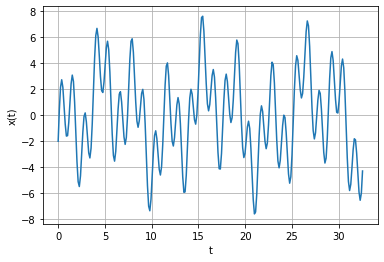

In [0]:
w1=np.sqrt(3)
w2=5
w3=1/np.sqrt(3)
f1=w1/(2*np.pi)
f2=w2/(2*np.pi)
f3=w3/(2*np.pi)
print('F1 = %.1f[Hz];F2 = %.1f[Hz];F3 = %.1f[Hz]' % (f1,f2,f3))
fs=10*f2
t1=1/f1
t2=1/f2
t3=1/f3
ts=1/fs
vt = np.arange(0,3*t3,ts)
x = 3*np.sin(np.sqrt(3)*vt)+3*np.sin(5*vt)-2*np.cos(vt/np.sqrt(3))
plt.plot(vt,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

• $x(t)=3\sin(4t)-2\cos(50t)+2\cos(10t)$

$w_1=4=\frac{2\pi}{T_1}, w_2=50= \frac{2\pi}{T_2} , w_3= 10 =\frac{2\pi}{T_3} $

$\frac{w_1}{w_2}=\frac{4}{50},\frac{w_1}{w_3}=\frac{4}{10},\frac{w_2}{w_3}=\frac{50}{10} $ -> todas son entero sobre entero por lo que es una señal cuasiperiodica.

Ahora hallamos el periodo 'T' de la señal:

$T_1= \frac{\pi}{2},T_2= \frac{\pi}{25},T_3= \frac{\pi}{5} $

$k_1T_1=k_2T_2=k_3T_3=T$

\begin{align}
k_1\frac{\pi}{2}=k_2\frac{\pi}{25}=k_3\frac{\pi}{5} =T
\end{align}

simplificando tenemos:

$25k_1=2k_2=10_k3$

m.c.m(25,2,10)-> m.c.m=$5^2*2$-> m.c.m= 50

$25k_1=2k_2=10_k3=50$ -> $k_1=2, k_2=25, k_3= 5$ reemplazamos en (1)

$2\frac{\pi}{2}=25\frac{\pi}{25}=5\frac{\pi}{5} = \pi$

$$\pi=T$$

F1 = 0.6[Hz];F2 = 8.0[Hz];F3 = 1.6[Hz]


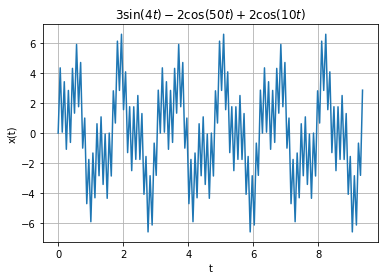

In [0]:
w1=4
w2=50
w3=10
f1=w1/(2*np.pi)
f2=w2/(2*np.pi)
f3=w3/(2*np.pi)
print('F1 = %.1f[Hz];F2 = %.1f[Hz];F3 = %.1f[Hz]' % (f1,f2,f3))
fs=2*f2
ts=1/fs
t= (np.pi)
vt = np.arange(0,3*t,ts)
x = 3*np.sin(4*vt)-2*np.cos(50*vt)+2*np.cos(10*vt)
plt.plot(vt,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('$3\sin(4t)-2\cos(50t)+2\cos(10t)$')
plt.grid()
plt.show()



• $x(t)=e^{jwt}$

$e^{jwt}=e^{jw(t\pm T)}$=?

$e^{jw(t\pm T)}=e^{jwt}e^{\pm jwT} $ 

Como debe ser igual a $e^{jwt}$ entonces $e^{\pm jwT}=1 $

$e^{\pm jwT}= \cos(wt) \pm j\sin(wT)= 1$

$w= \frac{2\pi}{T_o}, T_o=T$

$\cos(\frac{2\pi}{T}T) \pm j\sin(\frac{2\pi}{T}T)=1$

$\cos(\frac{2\pi}{T}T)=1$, $j\sin(\frac{2\pi}{T}T)=0$ -> se cumple

como $e^{jwt}=e^{jw(t\pm T)}$-> **la señal es periodica**

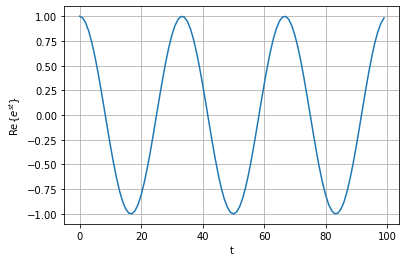

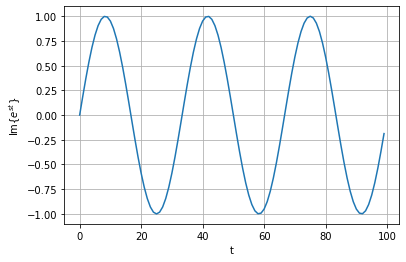

In [0]:
w=3
f=w/(2*np.pi)
t=1/f
fs= 2*f
vt = np.arange(0,3*t,ts)
x = np.exp(1j*w*vt)
plt.plot(np.real(x))
plt.ylabel('Re{$e^{st}$}')
plt.xlabel('t')
plt.grid()
plt.show()
plt.plot(np.imag(x))
plt.ylabel('Im{$e^{st}$}')
plt.xlabel('t')
plt.grid()
plt.show()


#3.Señales de energia y potencia
– Clasifique segun su tipo (energía o potencia) y Grafique cada una de las senales en Python (considere simulaciones tipo plot para tiempo continuo y stem para tiempo discreto).

$x(t) = -3t + 1$; ∀t ∈ [0, 5]

$E_x= \int_{T} \left|x(t)\right|^2dt$

$E_x= \int_{0}^{5} \left|-3t+1\right|^2dt$

$E_x= \int_{0}^{5} (9t^2-6t+1)dt$

$E_x=9\frac{t^3}{3}\Biggr|_{0}^{5}-6\frac{t^2}{2}\Biggr|_{0}^{5}+t\Biggr|_{0}^{5}$

$E_x=350$-> al ser un numero finito se comprueba que es una señal de energia





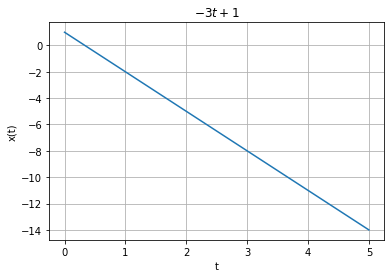

In [0]:
vt = np.arange(0,6,1)
x = -3*vt+1
plt.plot(vt,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('$-3t+1$')
plt.grid()
plt.show()

$x(t)= A\cos(wt)+B\sin(wt)$;$A,B,w\in \mathbb{R}^+$

$E_x= \int_{\frac{-T}{2}}^{\frac{T}{2}} \left|A\cos(wt)+B\sin(wt)\right|^2dt$

$E_x= \int_{\frac{-T}{2}}^{\frac{T}{2}}A^2cos^2(wt)+2AB\cos(wt)\sin(wt)+B^2\sin^2(wt)dt$

sustituyendo, integrando, evaluando y reemplazando $w=\frac{2\pi}{T}$ tenemos que:

$E_x=A^2[\frac{T}{2}+\frac{1}{4w}[\sin(2\pi)-\sin(-2\pi)]]+2AB[\frac{\sin^2(\pi)}{2}-\frac{\sin^2(-\pi)}{2}]+B^2[\frac{T}{2}-\frac{1}{4w}[\sin(2\pi)-\sin(-2\pi)]]$

Como:

 $\sin(2\pi)-\sin(-2\pi)=0$; $\frac{\sin^2(\pi)}{2}-\frac{\sin^2(-\pi)}{2}=0$

 entonces:

 $E_x=A^2\frac{T}{2}+B^2\frac{T}{2}$

$\lim_{T\rightarrow \infty}E_x= \lim_{N\rightarrow \infty} A^2\frac{T}{2}+B^2\frac{T}{2} {\rightarrow \infty}$-> por lo que la funcion no es de energia

 $P_x=\frac{1}{T}E_x$

$\lim_{T\rightarrow \infty}P_x=\frac{A^2}{2}+\frac{B^2}{2}$-> numero finito, por lo que **la señal es de potencia** 



F = 0.8[Hz]


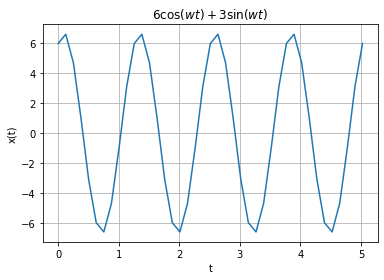

In [0]:
a=6
b=3
w= 5
f=w/(2*np.pi)
print('F = %.1f[Hz]'% (f))
fs= 10*f
t= 1/f
ts= 1/fs
vt = np.arange(0,4*t,ts)
x = a*np.cos(w*vt)+b*np.sin(w*vt)
plt.plot(vt,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("$6\cos(wt)+3\sin(wt)$")
plt.grid()
plt.show()


$x(t) = ate^{-kt}(u(t)-u(t-t_o))$; con $t_o>0$ y $a,k \in \mathbb{R}$

$E_x= \int^{T/2}_{-T/2}{\left|ate^{-kt}(u(t)-u(t-t_o))\right|^2}dt = \int^{t_o}_{0}{\left|ate^{-kt}\right|^2}dt $

$E_x= \int^{t_o}_{0}{a^2 t^2 e^{-2kt}} dt$ 

Integrando 2 veces por partes, y simplificando la expresion obtenemos:

 $E_x=-\frac{\left(2a^2k^2t^2+2a^2kt+a^2\right)e^{-2kt}}{4k^3}\Biggr|_{0}^{t_o}$


 $E_x= \frac{a^2}{4k^3}-\frac{\left(2a^2k^2t_o^2+2a^2kt_o+a^2\right)e^{-2kt_o}}{4k^3}$

$\lim_{t_o\rightarrow \infty}E_x= \lim_{t_o\rightarrow \infty} \frac{a^2}{4k^3}-\frac{\left(2a^2k^2t_o^2+2a^2kt_o+a^2\right)e^{-2kt_o}}{4k^3}$

Derivando dos veces arriba y abajo obtenemos que:

$\lim_{t_o\rightarrow \infty}E_x= \frac{a^2}{4k^3}$-> por lo que **la señal es de energia** siempre y cuando $k
>0$ 

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


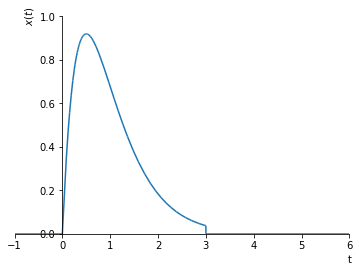

In [0]:
import sympy as sym
sym.init_printing()
t, k, a, to = sym.symbols('t k a to', real=True)

u = sym.Heaviside(t)
uto = sym.Heaviside(t-to)
vt = u -uto

x = a*t*sym.exp(-k*t)*vt
sym.plot(x.subs({a: 5, k : 2, to : 3}), (t, -1, 6), ylabel=r'$x(t)$')

$x[n]= nu[n]$; $n\in\{0\pm1,\pm2,\dots,\pm N\}$

$E_x=\sum^N_{n=-N}{\left|nu[n]\right|^2}=\sum^N_{n=0}{\left|n\right|^2}$

$E_x=\sum^N_{n=0}{n^2}= \frac{1}{6}N(N+1)(2N+1)$

$\lim_{N\rightarrow \infty}E_x= \lim_{N\rightarrow \infty} \frac{1}{6}N(N+1)(2N+1) {\rightarrow \infty}$-> Por lo que **la señal no es de energia**

$P_x= \frac{E_x}{2N+1}$

$\lim_{N\rightarrow \infty}P_x=\lim_{N\rightarrow \infty}\frac{E_x}{2N+1}=\lim_{N\rightarrow \infty}\frac{1}{6}N(N+1)= {N\rightarrow \infty}$->**La señal no es de potencia**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


Text(0, 0.5, '$x[n]$')

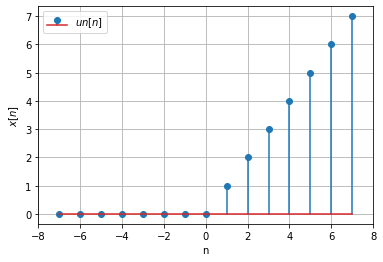

In [0]:
N= 7
n = np.linspace(-N,N,2*N+1)
u = n >= 0
x = n*u
plt.stem(n,x,label="$un[n]$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-N-1,N+1)
plt.xlabel("n")
plt.ylabel("$x[n]$")



$x[n]=\cos[n\pi]+\sin[\frac{2n\pi}{3}]$; $n\in\{0,1,2,\dots, N\}$,$N \in \mathbb{N}$.

$E_x=\sum^N_{n=0}{\left|\cos[n\pi]+\sin[\frac{2n\pi}{3}\right|^2}$

$E_x=\sum^N_{n=0}\cos^2[n\pi]+2\cos[n\pi]\sin[\frac{2n\pi}{3}]+\sin^2[\frac{2n\pi}{3}]$

$\cos[n\pi]=(-1)^n$

$E_x=\sum^N_{n=0}(-1)^{2n}+2(-1)^n\sin[\frac{2n\pi}{3}]+\sin^2[\frac{2n\pi}{3}]$

$E_x= N+1+\frac{4N(\frac{-\sqrt(3)}{2})}{3}+\frac{2N(\frac{-\sqrt(3)}{2})^2}{3}$

$E_x=N+1-\frac{2N\sqrt(3)}{3}+\frac{N}{2}$

$\lim_{N\rightarrow \infty}E_x= \lim_{N\rightarrow \infty} N+1-\frac{2N\sqrt(3)}{3}+\frac{N}{2} {\rightarrow \infty}$-> Por lo que **la señal no es de energia**

$P_x=\frac{1}{N+1}E_x$

$\lim_{N\rightarrow \infty}P_x=\lim_{N\rightarrow \infty}\frac{1}{N+1}E_x=\lim_{N\rightarrow \infty}\frac{-4\sqrt(3)N+3N}{6(N+1)}$

Derivando arriba y abajo se obtiene que:

$\lim_{N\rightarrow \infty}P_x=\lim_{N\rightarrow \infty}\frac{4\sqrt(3)+3}{6}=\frac{4\sqrt(3)+3}{6}$->al obtener un numero finito podemos decir que **la señal es de potencia**





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


Text(0, 0.5, '$x[n]$')

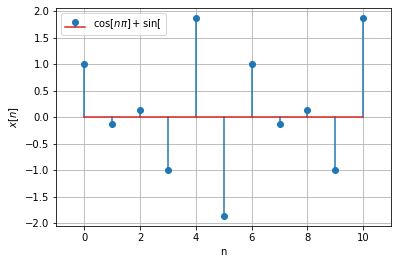

In [0]:
N= 10
n = np.linspace(0,N,N+1)
x = np.cos(n*np.pi)+np.sin((2*n*np.pi)/3)
plt.stem(n,x,label="$\cos[n\pi]+\sin[\frac{2n\pi}{3}$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-1,N+1)
plt.xlabel("n")
plt.ylabel("$x[n]$")


$x[n]=A \cos[n\pi]u[n-n_o],$ donde $A\in \mathbb{R}^+,$ $n\in\{0\pm1,\pm2,\dots,\pm N\},$ y $0<n_o<N.$ 

$E_x= \sum^N_{n=-N}{\left|A \cos[n\pi]u[n-n_o]\right|^2}=\sum^N_{n=n_o}{\left|A \cos[n\pi]\right|^2}$

$E_x= \sum^N_{n=n_o}{\frac{A^2}{2} +\frac{A^2}{2}\cos[2n\pi]}$

como $\cos[2n\pi]=1$. la sumatoria queda:

$ \sum^N_{n=n_o}A^2 = A^2(N-n_o+1)$

$\lim_{N\rightarrow \infty}E_x= \lim_{N\rightarrow \infty}A^2(N-n_o+1) {N\rightarrow \infty} $->la señal no es de energia.

$P_x=\frac{E_x}{2N+1}$

$\lim_{N\rightarrow \infty}P_x= \lim_{N\rightarrow \infty}\frac{A^2(N-n_o+1)}{2N+1}$

Derivando arriba y abajo respecto a N obtenemos que:

$\lim_{N\rightarrow \infty}P_x= \frac{A^2}{2}$-> al ser un numero finito, **la señal es de potencia**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


Text(0, 0.5, '$x[n]$')

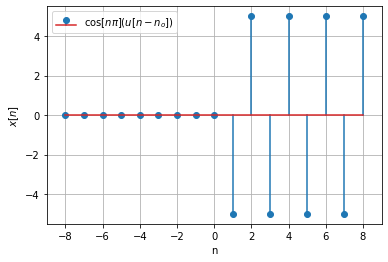

In [0]:
N = 8
n0 = 1
A  = 5
n = np.linspace(-N,N,2*N+1)
u = n >= n0 
x = A*np.cos(n*np.pi)*u
plt.stem(n,x,label="$\cos[n\pi](u[n-n_o])$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-N-1,N+1)
plt.xlabel("n")
plt.ylabel("$x[n]$")

#4.Discretizacion de señales cosenoidales

Se pretende muestrearla señal $x(t)=\cos(\Omega t)$, con $t \in [0,T]$,$\Omega=2\pi F$, $F=\frac{1}{T}$ y $F=60$[Hz]. Se emplea un sistema de discretizacion con una frecuencia de muestreo $Fs=90$[Hz]. Demuestre si el sistema utilizado es apropiado para la señal $x(t)$ y estime la señal capturada. Realice una simulacion en Phyton del proceso de discretizacion.

$x(t)=\cos(\Omega t)$ ,  $x[t=nTs]=\cos[2\pi60nTs] = \cos[\frac{2\pi60n}{Fs}]$

$Fs=90$

$\cos[\frac{2\pi60n}{Fs}]= \cos[\frac{4\pi n}{3}] $ -> $\Omega=\frac{4\pi}{3}$

 Como $\Omega>\pi$

$\cos[\frac{4\pi n}{3}]$ --> Es un coseno copia, por lo que se comprueba que la frecuencia de muestreo usada no es la adecuada.

Para hallar la señal capturada debemos hallar el coseno original:

$\Omega^{original}= \Omega^{copia}-2\pi$

$\Omega^{original}= \frac{4\pi}{3}-2\pi$

$\Omega^{original}= \frac{-2\pi}{3}$

$x[n]= \cos[\frac{-2\pi}{3}n]$-> **señal capturada**


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


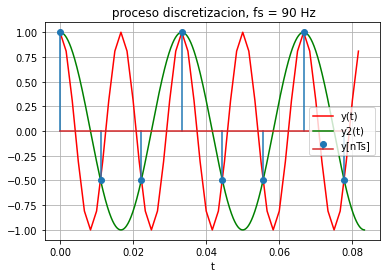

In [0]:
f=60
fs = 90 # frecuencia muestreo ejercicio
fss= 10*f
Tp= 1/f
u=fs-f
t = np.arange(0,3*Tp,1/fss)
y= np.cos(2*np.pi*f*t)
ua=np.abs(u)
t = np.arange(0,5*Tp,1/fss)
y= np.cos(2*np.pi*f*t)
tm = np.arange(0,5*Tp,1/fs)
tm1=np.arange(0,5*Tp,0.0001)
ym= np.cos(2*np.pi*f*tm)
ym2= np.cos(2*np.pi*ua*tm1)
plt.plot(t,y,color='r',label="y(t)")
plt.plot(tm1,ym2,color='g',label="y2(t)")
plt.stem(tm,ym,label="y[nTs]")
plt.legend()
plt.xlabel('t')
plt.grid()
plt.title(" proceso discretizacion, fs = 90 Hz")
plt.show()

Por la grafica anterior podemos observar que la frecuencia de discretizacion usada esta mal, ya que esta deberia seguir la señal $y(t)$, pero la señal capturada es $y2(t)$, dicha señal tiene una frecuencia denominada **Frecuencia alias** que ocurre cuando no se usa el **Teorema de Nyquist**.

La frecuencia alias en este caso es: $(Fs-F)= (90-60)=30$[Hz]

la frecuencia de nyquist, es decir, frecuencia que debio ser utilizada para seguir la señal $y(t)$ es: $Fs \geq 2 *60$

– Se tiene un microprocesador de 3 bits con entrada analoga entre 0 y 10 [v]. Describa las condiciones necesarias para que el microprocesador pueda digitalizar la señal $x(t)=9\cos(200\pi t)$. Presente una simulacion en Python de dicho proceso para un ciclo de la señal $x(t)$.

$w=200\pi= 2\pi F$-->$F=100$[Hz]

$Fs\geq2*100$-->Nyquist

queremos hallar la funcion 
\begin{align}
y(t)=mx(t)+b  \\
\end{align}
$y(t) \in$ [0,10], $x(t)\in $ [-9,9]

$m=\frac{y_2-y_1}{x_2-x_1} = \frac{10-0}{9-(-9)}= \frac{5}{9}$

$b= y_2-mx_2$ -->$b= 10-\frac{5}{9}(9) = 5$

Reemplazando m y b en (1)

$y(t)= \frac{5}{9}x(t)+5$

$y(t)= \frac{5}{9}(9\cos(200\pi t))+5$

discretizando tenemos:

$y[t=\frac{n}{Fs}]= \frac{5}{9}(9\cos[200\pi \frac{n}{Fs}])+5$

$y[n]= 5\cos[200\pi \frac{n}{Fs}]$

Etapa de cuantizacion, 8 estados $2^3=8$, con tamaño de paso en voltaje igual a $\Delta v = 5/4 = 1.25 [v]$

\begin{array}{c|c} \hline
x[n] & x_c[n] & Binario\\ \hline
[0.00,1.25) & 0.00 & 0 0 0\\ \hline
[1.25,2.50) & 1.25 & 0 0 1\\ \hline
[2.50,3.75) & 2.50 & 0 1 0\\ \hline
[3.75,5.00) & 3.75 & 0 1 1\\ \hline
[5.00,6.25) & 5.00 &1 0 0\\ \hline
[6.25,7.50) & 6.25 &1 0 1\\ \hline
[7.50,8.75) & 7.50 &1 1 0\\ \hline
[8.75,10.00] & 8.75 &1 1 1\\ \hline
\end{array}




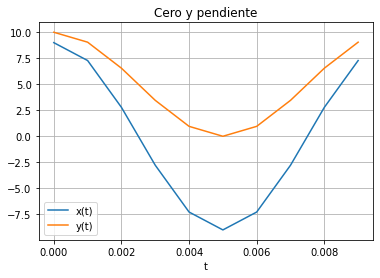

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


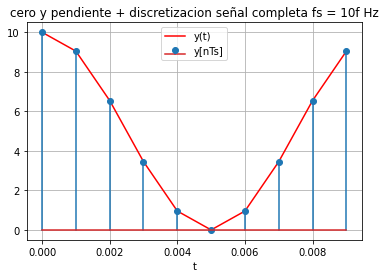

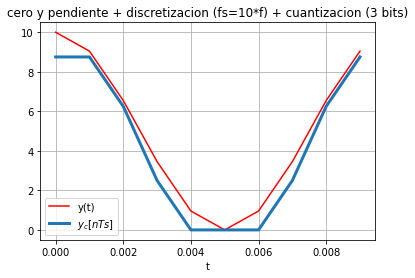

In [0]:
f = 100
fs = 10*f #frecuencia de muestreo
T = 1/f #tiempo a graficar
t = np.arange(0,T,1/fs)

x = 9*np.cos(2*np.pi*f*t)

xmin = min(x)
xmax = max(x)
ymin = 0
ymax = 10
m = (ymax - ymin)/(xmax-xmin)
b = ymax - m*xmax
y = m*x+b

plt.plot(t,x,label="x(t)")
plt.plot(t,y,label="y(t)")
plt.legend()
plt.xlabel('t')
plt.grid()
plt.title("Cero y pendiente")
plt.show()

plt.plot(t,y,color='r',label="y(t)")
plt.stem(t,y,label="y[nTs]")
plt.legend()
plt.xlabel('t')
plt.grid()
plt.title("cero y pendiente + discretizacion señal completa fs = 10f Hz")
plt.show()

# cero y pendiente mas discretizacion mas cuantizacion
yc = np.zeros(len(y))

for i in range(len(y)):
    if y[i] < 1.25:
       yc[i] = 0
    elif (y[i] >= 1.25) and (y[i] <= 2.5):
        yc[i] = 1.25
    elif (y[i] >= 2.5) and (y[i] <= 3.75):
        yc[i] = 2.5
    elif (y[i] >= 3.75) and (y[i] <= 5.0): 
         yc[i] = 3.75 
    elif (y[i] >= 5.0) and (y[i] <= 6.25): 
         yc[i] = 5.0
    elif (y[i] >= 6.25) and (y[i] <= 7.5):
         yc[i] = 6.25
    elif (y[i] >= 7.5) and (y[i] <= 8.75): 
         yc[i] = 7.5           
    else:
        yc[i] = 8.75
    
plt.plot(t,y,color='r',label="y(t)")
plt.plot(t,yc,label="$y_c[nTs]$",linewidth = 3)
plt.legend()
plt.xlabel('t')
plt.grid()
plt.title("cero y pendiente + discretizacion (fs=10*f) + cuantizacion (3 bits)")
plt.show()

Se tiene un sistema de discretizacion con frecuencia de muestreo $Fs = 40 [Hz]$, aplicado a las señales $x_1(t) = \cos(20\pi t)$ y $x_2(t) = \cos(100\pi t)$. Las versiones discretizadas de las senales son distinguibles entre si?. Implemente simulacion en Python del proceso de discretización. 

Dizcretizando $x_1$ tenemos con $Fs = 40 [Hz]$:

$x_1[t=nTs]=\cos[20\pi nTs]$ 

$x_1[n]=\cos[\frac{20}{40}\pi n]$

$x_1[n]=\cos[\frac{1}{2}\pi n]$ --> Coseno original, $\Omega_1=\frac{1}{2}\pi$

Ahora discretizamos $x_2$ con $Fs = 40 [Hz]$:

$x_2[t=nTs]=\cos[100\pi nTs]$ 

$x_2[n]=\cos[\frac{100}{40}\pi n]$

$x_2[n]=\cos[\frac{5}{2}\pi n]$ --> Coseno copia, por lo que sabemos que la frecuencia de muestreo usada no fue la adecuada; ahora vamos a hallar el coseno original :

$\Omega_2^{original}= \Omega_2^{copia} - 2\pi$

$\Omega_2^{original}= \frac{5}{2}\pi-2\pi = \frac{1}{2}\pi$

Como $ = \Omega_2^{original}=\frac{1}{2}\pi = \Omega_1$ --> **las señales no son distinguibles entre si**


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


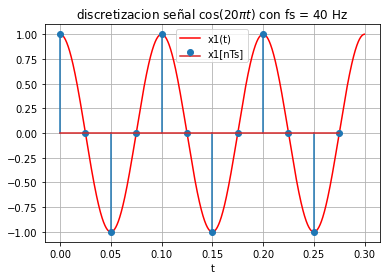

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


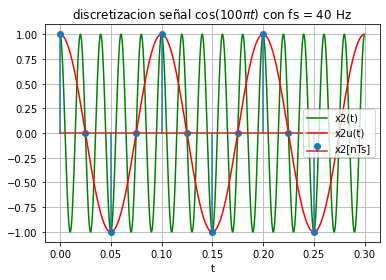

In [0]:
w1= 20*np.pi
w2= 100*np.pi
f1 = w1/(2*np.pi)
f2 = w2/(2*np.pi)
fss = 100*f2 #frecuencia de muestreo para emular tiempo continuo
fs = 40 # frecuencia muestreo ejercicio
Tplot = 3/f1 #tiempo a graficar
t = np.arange(0,Tplot,1/fss)

x1 = np.cos(2*np.pi*f1*t)
x2 = np.cos(2*np.pi*f2*t)
tm = np.arange(0,Tplot,1/fs)
x1m = np.cos(2*np.pi*f1*tm)
x2m = np.cos(2*np.pi*f2*tm)
plt.plot(t,x1,color='r',label="x1(t)")
plt.stem(tm,x1m,label="x1[nTs]")
plt.title("discretizacion señal $\cos(20\pi t)$ con fs = 40 Hz")
plt.grid()
plt.legend()
plt.xlabel('t')
plt.show()

u= fs-f2
ua= np.abs(u)
tm2 = np.arange(0,Tplot,0.001)
x2u= np.cos(2*np.pi*ua*tm2)
plt.plot(t,x2,color='g',label="x2(t)")
plt.plot(tm2,x2u,color='r',label="x2u(t)")
plt.stem(tm,x2m,label="x2[nTs]")
plt.title("discretizacion señal $\cos(100\pi t)$ con fs = 40 Hz")
plt.grid()
plt.legend()
plt.xlabel('t')
plt.show()



en las graficas se puede observar que la señal $x_1$ esta bien discretizada con $Fs= 40[Hz]$, pero al discretizar la señal $x_2$ con esa misma frecuencia de muestreo hay un problema, ya que la señal que se sigue es $x_2u$ que es igual a $x_1$ por lo que las versiones discretizadas de estas señales no son distinguibles entre si

Cuál es la frecuencia de muestreo límite apropiada para discretizar la señal $x(t) = 3 \cos(2000\pi t) + 5 \sin(6000\pi t) + 10 \cos(12000\pi t)$?. Si se utiliza una frecuencia de muestreo de 5kHz, cuál es la señal discreta obtenida?

$w_1=2000\pi=2\pi F_1$, $w_2=6000\pi=2\pi F_2$ , $w_3=12000\pi=2\pi F_3$

$\frac{w_1}{w_2}=\frac{2000\pi}{6000\pi}$ , $\frac{w_1}{w_3}=\frac{2000\pi}{12000\pi}$ , $\frac{w_3}{w_2}=\frac{12000\pi}{6000\pi}$ --> es una señal cuasperiodica.

$F_1=\frac{2000\pi}{2\pi}= 1000[Hz]$ , $F_2=\frac{6000\pi}{2\pi}= 3000[Hz]$ , $F_3=\frac{12000\pi}{2\pi}= 6000[Hz]$

$Fs\geq2*F_{max}$ --> $Fs\geq2*F_3$ 

**La frecuencia de muestreo limite debe ser:** $Fs\geq12000[Hz]$

Discretizando con $Fs=5000[Hz]$

$x[t=nTs]=3\cos[2000\pi nTs] + 5\sin[6000\pi nTs]+ 10\cos[12000\pi nTs]$

$x[n]= 3\cos[\frac{2000\pi}{Fs}n]+5\sin[\frac{6000\pi}{Fs}n] + 10\cos[\frac{12000\pi}{Fs}n]$

$x[n]= 3\cos[\frac{2\pi}{5}n]+5\sin[\frac{6\pi}{5}n] + 10\cos[\frac{12\pi}{5}n]$

$\Omega\in[-\pi,\pi]$

$\Omega_1= \frac{2}{5}\pi$ --> original , $\Omega_2= \frac{6}{5}\pi$ -->copia , $\Omega_3= \frac{12}{5}\pi$ --> copia

$\Omega_2^{original} = \Omega_2^{copia} - 2\pi = \frac{-4}{5}\pi$

$\Omega_3^{original} = \Omega_3^{copia} - 2\pi = \frac{2}{5}\pi$

Ahora tenemos que:

$x[n]= 3\cos[\frac{2\pi}{5}n]+5\sin[\frac{-4\pi}{5}n] + 10\cos[\frac{2\pi}{5}n]$

$x[n]= 13\cos[\frac{2\pi}{5}n]+5\sin[\frac{-4\pi}{5}n]$ --> **señal discreta obtenida**


F1 = 1000.0[Hz];F2 = 3000.0[Hz];F3 = 6000.0[Hz]


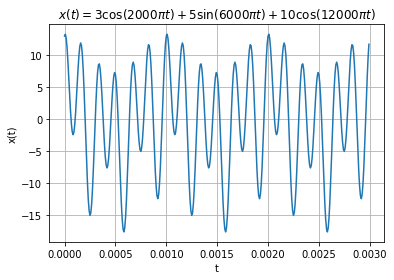

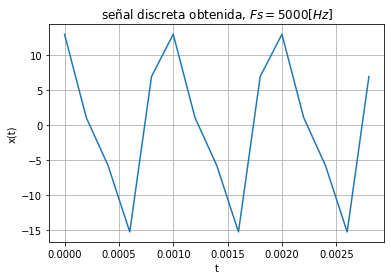

In [0]:
w1 = 2000*np.pi
w2 = 6000*np.pi
w3 = 12000*np.pi
f1 = w1/(2*np.pi)
f2 = w2/(2*np.pi)
f3 = w3/(2*np.pi)
print('F1 = %.1f[Hz];F2 = %.1f[Hz];F3 = %.1f[Hz]' % (f1,f2,f3))
fs1 = 5000
fs = 20*f3
t1 = 1/f1
t2 = 1/f2
t3 = 1/f3
ts = 1/fs
ts1 = 1/fs1

vt1 = np.arange(0,3*t1,ts1) 
vt2 = np.arange(0,3*t1,ts) 

x = 3*np.cos(w1*vt2) + 5*np.sin(w2*vt2) + 10*np.cos(w3*vt2)
plt.plot(vt2,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.title('$x(t)=3 \cos(2000\pi t) + 5 \sin(6000\pi t) + 10 \cos(12000\pi t)$')
plt.show()

x = 3*np.cos(w1*vt1) + 5*np.sin(w2*vt1) + 10*np.cos(w3*vt1)
plt.plot(vt1,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('señal discreta obtenida, $Fs= 5000[Hz]$')
plt.grid()
plt.show()

Demuestre que funciones cosenoidales con frecuencias de oscilacion $F_k=F_o+kFs$; con $k\in \mathbb{Z}$ , no son distinguibles de la funcion $\cos(2\pi F_ot)$ al utilizar un sistema de discretizacion con frecuencia de muestreo Fs. Realice simulasiones para $k \in ({0, \pm1, \pm2, \pm3})$

$x(t)=\cos(2\pi F_ot) + \cos(2\pi F_kt)$

$x(t)=\cos(2\pi F_ot) + \cos(2\pi t(F_o+kFs))$

$x(t)=\cos(2\pi F_ot) + \cos(2\pi tF_o+ 2\pi tkFs)$

$x[t=\frac{n}{Fs}]=\cos[2\pi n\frac{F_o}{Fs}]+ \cos[2\pi n\frac{F_o}{Fs}+2\pi nk\frac{Fs}{Fs}]$

$x[t=\frac{n}{Fs}]= \cos[2\pi nf]+\cos[2\pi nf]\cos[2\pi nk]- \sin[2\pi nf]\sin[2\pi nr]$

$nk=r\in \mathbb{Z}$ , $\sin[2\pi r]=0$ , $\cos[2\pi r]=1$

$x[n]=\cos[2\pi nf] + \cos[2\pi nf]$

$x[n]=2\cos[2\pi nf]$ --> **no son distinguibles entre si**, se volvieron un mismo coseno

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


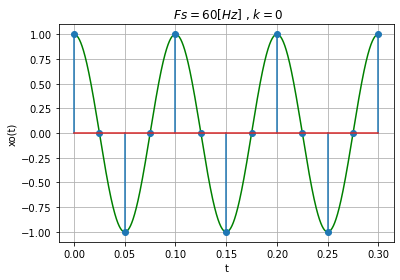

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


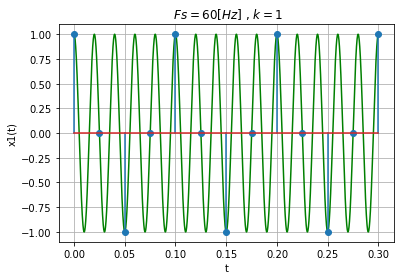

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


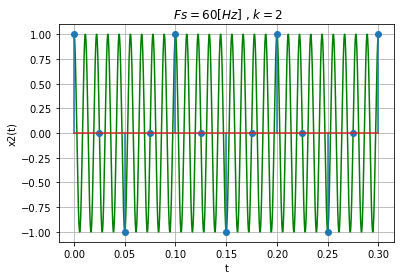

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


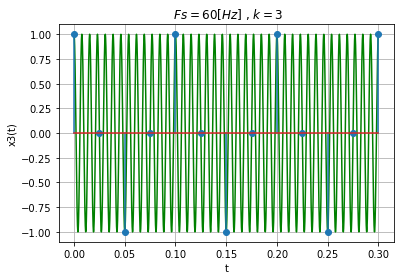

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


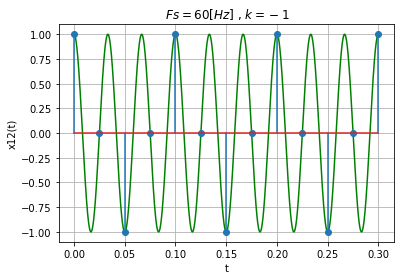

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


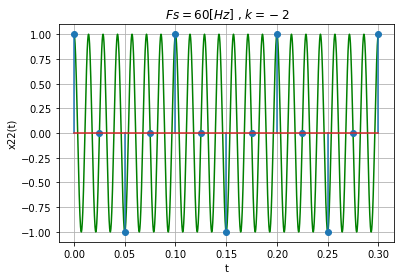

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


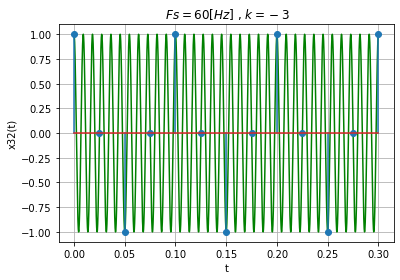

In [0]:
fo=10
t1=1/fo
fs=40
ts=1/fs
fko=fo
fk1=fo+fs
fk2=fo+2*fs
fk3=fo+3*fs
fk12=fo-fs
fk22=fo-2*fs
fk32=fo-3*fs
t = np.arange(0,3*t1,0.0001)
xo=np.cos(2*np.pi*fko*t)
x1=np.cos(2*np.pi*fk1*t)
x2=np.cos(2*np.pi*fk2*t)
x3=np.cos(2*np.pi*fk3*t)
x12=np.cos(2*np.pi*fk12*t)
x22=np.cos(2*np.pi*fk22*t)
x32=np.cos(2*np.pi*fk32*t)

n= np.arange(0, 3*t1, ts)
xpo= np.cos(2*np.pi*fko*n)
xp1= np.cos(2*np.pi*fk1*n)
xp2= np.cos(2*np.pi*fk2*n)
xp3= np.cos(2*np.pi*fk3*n)
xp12= np.cos(2*np.pi*fk12*n)
xp22= np.cos(2*np.pi*fk22*n)
xp32= np.cos(2*np.pi*fk32*n)

plt.plot(t,xo,'green')
plt.stem(n,xpo)
plt.xlabel('t')
plt.ylabel('xo(t)')
plt.title(' $Fs= 60[Hz]$ , $k=0$')
plt.grid()
plt.show()

plt.plot(t,x1,'green')
plt.stem(n,xp1)
plt.xlabel('t')
plt.ylabel('x1(t)')
plt.title(' $Fs= 60[Hz]$ , $k=1$')
plt.grid()
plt.show()

plt.plot(t,x2,'green')
plt.stem(n,xp2)
plt.xlabel('t')
plt.ylabel('x2(t)')
plt.title(' $Fs= 60[Hz]$ , $k=2$')
plt.grid()
plt.show()

plt.plot(t,x3,'green')
plt.stem(n,xp3)
plt.xlabel('t')
plt.ylabel('x3(t)')
plt.title(' $Fs= 60[Hz]$ , $k=3$')
plt.grid()
plt.show()

plt.plot(t,x12,'green')
plt.stem(n,xp12)
plt.xlabel('t')
plt.ylabel('x12(t)')
plt.title(' $Fs= 60[Hz]$ , $k=-1$')
plt.grid()
plt.show()

plt.plot(t,x22,'green')
plt.stem(n,xp22)
plt.xlabel('t')
plt.ylabel('x22(t)')
plt.title(' $Fs= 60[Hz]$ , $k=-2$')
plt.grid()
plt.show()

plt.plot(t,x32,'green')
plt.stem(n,xp32)
plt.xlabel('t')
plt.ylabel('x32(t)')
plt.title(' $Fs= 60[Hz]$ , $k=-3$')
plt.grid()
plt.show()

Con las graficas podemos observar que para cualquier valor de **k** la señal que sigue el muestreo es la misma y es la de la grafica inicial =$\cos(2\pi fot)$, por lo que podemos demostrar que estas funciones cosenoidales no son distinguibles entre si

#5.Sistemas y manipulacion de señales

– Demuestre si los siguientes sistemas de la forma $y $= T{x}, son sistemas lineales e invariantes en el tiempo (SLIT). Simule los sistemas en Python.

–$y[n] = x[n]/3 + 2x[n-1]- y[n-1]$

comprobamos linealidad:

$y^1[n]=$ T{$ax_1[n]+bx_2[n]$}

$y^1[n]= (ax_1[n]+bx_2[n])/3+2(ax_1[n-1]+bx_2[n-1])-$ T{$ax_1[n-1]+bx_2[n-1]$}

$y^1[n]= (ax_1[n]+bx_2[n])/3+2(ax_1[n-1]+bx_2[n-1]) - ay[n-1]-by[n-1]$

$y^2[n]=$ aT{$x_1[n]$}+bT{$x_2[n]$}$

$y^2[n]=(ax_1[n]/3) + (bx_1[n]/3) + 2ax_1[n-1]+2bx_2[n-1]$ - aT{$x[n-1]$} - bT{$x[n-1]$}

$y^2[n]= (ax_1[n]+bx_2[n])/3+2(ax_1[n-1]+bx_2[n-1]) - ay[n-1]-by[n-1]$

Como $y^1[n] = y^2[n]$ --> es lineal

Comprobar invarianza:

$y[n-n_o]=$ T{$x[n-n_o]$} = $x[n-n_o]/3 + 2x[n -n_o-1]-y[n-1]$

$y[n;n_o]= x[n-n_o]/3 + 2x[n -n_o-1]-y[n-n_o-1]$

$y[n-n_o]\neq y[n;n_o]$ --> varia en el tiempo

**El sistema no es un SLIT**


In [0]:
import numpy as np

def sis(x):
	N=len(x)
	y=np.zeros(N)
	for n in range (1,N):
		y[n]=x[n]/3+2*x[n-1]-y[n-1]


	return y


x1=np.array([7,3,4,2])
x2=np.array([5,3,4,7])
x=3*x1+5*x2    
y1=sis(x)
y2=3*sis(x1)+5*sis(x2)

print(y1)
print(y2)

[  0.         100.         -41.33333333 119.        ]
[  0.         100.         -41.33333333 119.        ]


-$y[n]= \sum_{k= -\infty}^{n} x[k]$

comprobar linealidad

$y^1[n]=$ T{$ax_1[k]+bx_2[k]$}

$y^1[n] = \sum_{k= -\infty}^{n} ax_1[k] + bx_2[k] $

$y^1[n] = a\sum_{k= -\infty}^{n} x_1[k] + b \sum_{k= -\infty}^{n} x_2[k]$

$y^2[n]=$ aT{$x_1[k]$}+bT{$x_2[k]$}

$y^2[n] = a\sum_{k= -\infty}^{n} x_1[k] + b \sum_{k= -\infty}^{n} x_2[k]$

$y^1[n] = y^2[n]$ --> es lineal

Comprobar invarianza:

$y[k-k_o]=$ T{$ x[k-k_o]$}=  $\sum_{k= -\infty}^{n} x[k-k_o] $

$y[k;k_o]= \sum_{k= -\infty}^{n} x[k-k_o] $ --> invariante en el tiempo

**El sistemas es un SLIT**


In [5]:
import numpy as np


def sis(x):
    N=len(x)
    y=np.zeros(N)
    acum=0
    for n in range (0,N):
    
            
        acum = acum + x[n] 
            
        y[n]=acum
        
     

    return y
  
	
    


x1=np.array([7,3,4,2])
x2=np.array([5,3,4,7])
x=3*x1+5*x2    
y1=sis(x)
y2=3*sis(x1)+5*sis(x2)

print("y1=", y1)
print("y2=", y2)




y1= [ 46.  70. 102. 143.]
y2= [ 46.  70. 102. 143.]


$y_1=y_2$ por lo que se comprueba que es sistema es lineal

• $y[n] = median(x[n])$; donde median es la funcion médiana sobre una ventana de tamano 3. 

comprobar linealidad:

$y^1[n]= \tau\{ax_1[n]+bx_2[n]\}$

$y^1[n]=median(ax_1[n]+bx_2[n])$

$y^2[n]= a\tau\{x_1[n]\}+b\tau\{x_2[n]\}$

$y^2[n]=a*median(x_1[n])+b*median(x_2[n])$

$y^1[n]\neq y^2[n]$--> el sistema no es lineal **el sistema no es SLIT**



In [9]:
a=7
b=8
x1=np.array([5,9,7])
x2=np.array([9,3,2])
y=a*x1+b*x2
y1=np.median(y, axis=0)
y2=a*np.median(x1)+b*np.median(x2)
if y1 == y2:
  print ("es lineal")
elif y1 != y2:
  print ("no es lineal")  

no es lineal


-$y(t)=Ax(t)+ B$; $A,B \in \mathbb{R}$

Comprobar linealidad:

$y^1(t)=$ T{$ax_1(t)+bx_2(t)$}

$y^1(t)= A[ax_1(t)+bx_2(t)]+B$

$y^2(t)=$ aT{$x_1(t)$} + bT{$x_2(t)$}

$y^2(t)=a[Ax_1(t)+B] + b[Ax_2(t)+B]$

$y^1(t)\neq y^2(t)$ --> no es lineal, por lo tanto **no es un SLIT**

In [0]:
A=3
B=2
a=5
b=4
t= sym.symbols('t', real= True)
x1=t
x2=(t**2)
x=a*x1+b*x2
y1=A*x+B
y2=a*(A*x1+B)+b*(A*x2+B)
sym.simplify(y1)

In [0]:
sym.simplify(y2)

Como podemos ver las dos funciones son diferentes, por lo que sabemos que el sistema no es lineal, **no es SLIT**

– Hallar la salida $y[n]$ de un SLIT ante la entrada $x[n]=\{-1, 1, 3^\xi, 0, 5, 6, -1\}$, con respuesta al impulso
$h[n]=\{1, -2, 0^\xi, 1, -1\}$, donde $n\in \{0, \pm1, \pm2, \dots , \pm N\}$ y
$n=0$ para $x[n]^\xi$. Nota: Utilizar metodo gráfico para encontrar la salida y comprobar con simulacion en Python. Repíta el proceso para el sistema con respuesta al escalón $s[n]=\{-3, 4, -2, 3^\xi, 1, -1, 2, 5\}$.

Para hallar la salida con respuesta al impulto tenemos:

$y_1[n]= \tau\{x[n]\}= x[n]*h[n]=\sum_{k=-5}^{5}x[k]h[n-k]; \quad \forall n\in\{0,\pm 1, \pm 2, \pm 3, \pm 4, \pm 5\}.$

La respuesta al impulso es:

$y_1[n]= \{-1,3 ,1,-7,7^\xi, -2,-16,7,1-7 ,1\}$


Para hallar la respuesta al escalon tenemos:

$h_2[n] = s[n]-s[n-1]=\{-3,7,-6,5^\xi,-2,-2,3,3,-5\}.$

$y_2[n]= \tau\{x[n]\}= x[n]*h_2[n]=\sum_{k=-5}^{5}x[k]h[n-k]; \quad \forall n\in\{0,\pm 1, \pm 2, \pm 3, \pm 4, \pm 5\}.$

La respuesta al escalon es:

$y_2[n]=\{3,-10,4,10,-26,32^\xi,4,-24,43,-23,-10,35,-10,-33,5\}$


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


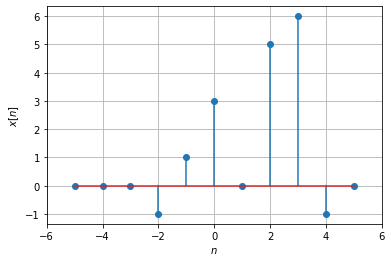

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


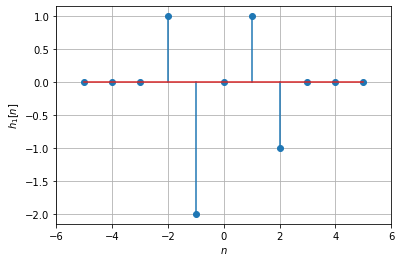

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


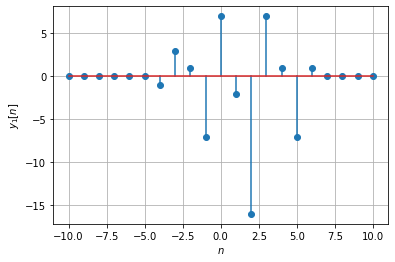

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


y_1[n]= [  0   0   0   0   0   0  -1   3   1  -7   7  -2 -16   7   1  -7   1   0
   0   0   0]


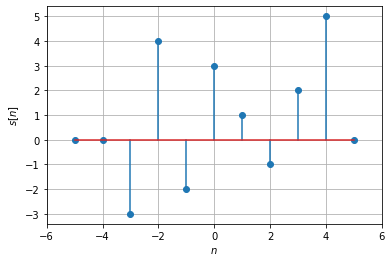

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


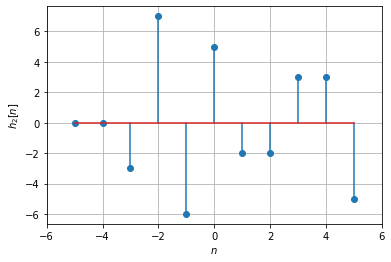

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


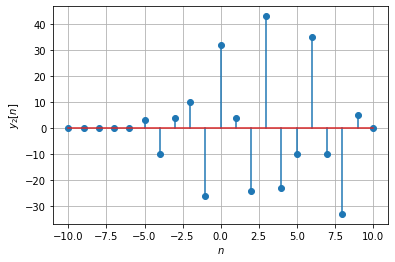

h_2[n]= [ 0  0 -3  7 -6  5 -2 -2  3  3 -5]
y_2[n]= [  0   0   0   0   0   3 -10   4  10 -26  32   4 -24  43 -23 -10  35 -10
 -33   5   0]


In [0]:
#para respuesta al impulso
x = [0,0,0,-1,1,3,0,5,6,-1,0]
h1= [0,0,0,1,-2,0,1,-1,0,0,0]
N = int(len(x)/2)
n = np.linspace(-N,N,2*N+1)

plt.stem(n, x, label=r'$x[n]$')
plt.xlim([-N-1,N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$x[n]$')
plt.grid()
plt.show()

plt.stem(n, h1, label=r'$h_1[n]$')
plt.xlim([-N-1,N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$h_1[n]$')
plt.grid()
plt.show()

y1 = np.convolve(x,h1)
ny = np.linspace(-2*N,2*N,4*N+1)
plt.stem(ny, y1, label=r'$y_1[n]$')
plt.xlim([-2*N-1,2*N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$y_1[n]$')
plt.grid()
plt.show()
print("y_1[n]=",y1)


#para la respuesta al escalon
s = [0,0,-3,4,-2,3,1,-1,2,5,0]
N = int(len(s)/2)

h2 = np.append(0,np.diff(s))

plt.stem(n, s, label=r'$s[n]$')
plt.xlim([-N-1,N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$s[n]$')
plt.grid()
plt.show()

plt.stem(n, h2, label=r'$h_2[n]$')
plt.xlim([-N-1,N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$h_2[n]$')
plt.grid()
plt.show()

y2 = np.convolve(x,h2)
ny = np.linspace(-2*N,2*N,4*N+1)
plt.stem(ny, y2, label=r'$y_2[n]$')
plt.xlim([-2*N-1,2*N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$y_2[n]$')
plt.grid()
plt.show()

print("h_2[n]=",h2)
print("y_2[n]=",y2)